<br>

###  <font color="Coral">hw8pr1digits_dreamer</font>   

For this hw8pr1digits_dreamer challenge, you'll leverage how NNets are the most capable model for imputing - or "hallucinating" - or _generating_ missing data 

Here, we'll put them to the test, to <font color="DodgerBlue"><b>dream</b></font> the unseen portion of a digit, only part of which is visible:



In [ ]:
#
# Here, we have a one-pixel predictor, to get you started...


In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [3]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
coltodrop = df.columns[65]     # get last column name (with the url)
df_clean = df.drop(columns=[coltodrop])  # drop by name is typical
df_clean.info()                         # should be happier!
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [4]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS: {COLUMNS}")  

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX: {COL_INDEX}")

# and for our "SPECIES"!
SPECIES = [ str(i) for i in range(0,10) ]  # list with a string at each index (index -> string)
SPECIES_INDEX = { s:int(s) for s in SPECIES }  # dictionary mapping from string -> index

# and our "target labels"
print(f"SPECIES: {SPECIES}")  
print(f"SPECIES_INDEX: {SPECIES_INDEX}")

COLUMNS: Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COL_INDEX: {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25

In [6]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_clean.to_numpy()    # .values gets the numpy array
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(f"A's shape is {A.shape}")
print(A)

A's shape is (1768, 65)
[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [6]:
#
# You will explore a different direction: "hallucinating" new data!
#      This is sometimes called "imputing" missing data.
#

# First, build a regressor that
#      + uses the first 48 pixels (6 image rows) to predict the floating-point value of pix52
#      + we'll see how accurate it is...
#      + then, you'll expand this process to build a regressor for _each_ pixel indexed from 48-63
#      + and use those to "imagine" the bottom two rows of the digits...

In [ ]:
#
# some starting code is provided here...
#

In [7]:
#
# regression model that uses as input the first 48 pixels (pix0 to pix47)
#                       and, as output, predicts the value of pix52
#

print("+++ Start of regression prediction of pix52! +++\n")

X_all = A[:,0:48]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
y_all = A[:,52]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

print(f"y_all (just target values, pix52)   is \n {y_all}") 
print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

+++ Start of regression prediction of pix52! +++

y_all (just target values, pix52)   is 
 [ 3.  9. 10. ... 15.  7.  8.]
X_all (just features: 3 rows) is 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.]]


In [11]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("labels (target)\n",y_all)
print("features\n", X_all[:3,:])

labels (target)
 [16. 15. 16. ...  3.  8. 16.]
features
 [[ 0.  0.  0.  4. 13. 13.  0.  0.  0.  0.  0. 10. 16. 16.  1.  0.  0.  0.
   3. 14. 16. 13.  0.  0.  0.  0.  8. 16. 16.  5.  0.  0.  0.  3. 15. 16.
  16.  4.  0.  0.  0.  4. 16. 16. 16.  6.  0.  0.]
 [ 0.  0. 13. 16. 16. 15.  2.  0.  0.  0. 14. 13. 11. 16.  2.  0.  0.  0.
  11. 13. 15.  6.  0.  0.  0.  0.  5. 16. 10.  0.  0.  0.  0.  0. 10. 14.
  15.  0.  0.  0.  0.  1. 14.  3. 15.  7.  0.  0.]
 [ 0.  0.  9. 16.  7.  0.  0.  0.  0.  0. 14. 13. 16.  2.  0.  0.  0.  0.
   7.  9. 15.  8.  0.  0.  0.  0.  0.  1. 13.  9.  0.  0.  0.  0.  0.  0.
  14.  7.  0.  0.  0.  0.  0.  4. 16.  5.  0.  0.]]


In [8]:
#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [15.  8.  4.  4.  9. 16. 10.  7. 16.  6. 10. 16.  3. 16. 12.  1. 16.  4.
  4.  1.  4. 12.  4.  7.  8. 16.  0. 10. 15. 15. 15.  9.  9. 16.  2.  1.
 13. 11.  0. 13. 10. 16. 16. 13.  2.  5. 10. 15. 16.  7.  5. 16. 14. 16.
 12.  4.  0. 11.  8. 12. 15. 14. 10.  9. 13.  9. 13. 15.  3.  3.  0.  9.
 16.  4. 14.  7. 14.  9. 16. 16. 16. 16. 14. 13. 11. 16.  7.  9.  5. 13.
 15.  9.  6. 12.  5. 15.  5.  8.  0. 10.  1. 10. 16.  4.  3.  1. 12. 15.
  4. 12.  0.  7. 14. 12.  7.  3.  8.  9.  8. 15. 16.  7.  9.  6. 15. 10.
 13.  8.  7.  1.  8.  4.  4. 16. 16.  5.  4.  8. 16. 16. 11. 12. 14.  9.
  5. 16.  0.  1.  3.  8.  5. 15.  7.  9.  7.  5. 16. 16. 10.  5.  0.  5.
 10.  6. 16.  8.  4. 12. 16. 16.  8. 12.  0. 11. 13.  0. 16. 14.  0. 16.
  6. 16. 14. 10. 16.  0. 16. 11. 16. 15.  2.  4. 15. 16.  0.  8. 16. 10.
 15.  5.  3.  4.  9.  6. 15. 13. 16. 16. 13.  5. 10.  1. 16.  0.  5. 11.
 14. 10. 16. 13. 13.  9. 12. 1

In [9]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
from sklearn.preprocessing import StandardScaler
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

X_all_scaled = scaler.transform(X_all)
y_all_scaled = y_all.copy()      # not scaled


# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

def ascii_table(X,y):
    """ print a table of binary inputs and outputs """
    print(f"{'input ':>70s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        s_to_show = str(X[i,:])
        s_to_show = s_to_show[0:60]
        print(f"{s_to_show!s:>70s} -> {'?':<5s} {y[i]:<5.0f}")   # !s is str ...
    
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])

#
# Note that the zeros have become -1's
# and the 1's have stayed 1's
#

                                                                input  -> pred  des. 
          [ 0.         -0.34553727 -1.09438435  0.50788149 -0.17803153 -> ?     14   
          [ 0.         -0.34553727 -0.03838635  0.27133853  0.97355394 -> ?     1    
          [ 0.         -0.34553727 -1.09438435 -1.38446219  0.74323685 -> ?     14   
          [ 0.         -0.34553727  0.17281325  0.98096741 -0.17803153 -> ?     10   
          [ 0.         -0.34553727 -0.03838635  0.98096741  0.97355394 -> ?     16   


In [33]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 1.59848636
Iteration 2, loss = 1.54073454
Iteration 3, loss = 1.55793646
Iteration 4, loss = 1.51838101
Iteration 5, loss = 1.64485937
Iteration 6, loss = 1.59051954
Iteration 7, loss = 1.49769248
Iteration 8, loss = 1.49908336
Iteration 9, loss = 1.50639915
Iteration 10, loss = 1.54574770
Iteration 11, loss = 1.49353040
Iteration 12, loss = 1.47483949
Iteration 13, loss = 1.58657999
Iteration 14, loss = 1.53710111
Iteration 15, loss = 1.49624971
Iteration 16, loss = 1.45615731
Iteration 17, loss = 1.45777623
Iteration 18, loss = 1.42711261
Iteration 19, loss = 1.41291702
Iteration 20, loss = 1.43646450
Iteration 21, loss = 1.38789881
Iteration 22, loss = 1.39965329
Iteration 23, loss = 1.33538694
Iteration 24, loss = 1.34851464
Iteration 25, loss = 1.30813779
Iteration 26, loss = 1.29244043
Iteration 27, loss = 1.52809201
Iteration 28, loss = 1.42973036
Iteration 29, loss = 1.35205032
Iteration 30, loss = 1.30674414

In [11]:
#
# how did it do? now we're making progress (by regressing)
#

def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        s_to_show = str(Xpr[i,:])
        s_to_show = s_to_show[0:25]  # we'll just take 25 of these
        print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    print("\n" + "+++++   +++++      +++++   +++++   ")
    print(f"average abs error: {error/len(y)}")
    print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data 
# 
if True:
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

# and how it did on the training data!
#
if False:
    ascii_table_for_regressor(X_train_scaled,
                            y_train_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above


                             input  ->   pred    des.    absdiff  
          [ 0.00000000e+00  0.00000 ->  +11.253  +15.000    3.747   
          [ 0.00000000e+00  0.00000 ->  +9.217  +8.000    1.217   
          [ 0.00000000e+00  0.00000 ->  +3.818  +4.000    0.182   
          [ 0.00000000e+00  0.00000 ->  +1.691  +4.000    2.309   
          [ 0.00000000e+00  0.00000 ->  +10.406  +9.000    1.406   
          [ 0.00000000e+00  1.00000 ->  +12.449  +16.000    3.551   
          [ 0.00000000e+00  0.00000 ->  +13.242  +10.000    3.242   
          [ 0.00000000e+00  0.00000 ->  +13.271  +7.000    6.271   
          [ 0.00000000e+00  0.00000 ->  +5.135  +16.000    10.865  
          [ 0.00000000e+00  0.00000 ->  +2.549  +6.000    3.451   
          [ 0.00000000e+00  0.00000 ->  +12.623  +10.000    2.623   
          [ 0.00000000e+00  0.00000 ->  +15.163  +16.000    0.837   
          [ 0.00000000e+00  4.00000 ->  +11.065  +3.000    8.065   
          [ 0.00000000e+00  0.00000 ->  +9.324  

In [12]:
#
# let's create a final nn_regressor for pix52
#
pix52_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
pix52_final_regressor.fit(X_all_scaled, y_all_scaled)
print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

print(f"The (sq) prediction error (the loss) is {pix52_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix52_final_regressor.loss_**0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++




++++++++++  TRAINING:   end  +++++++++++++++


The (sq) prediction error (the loss) is 3.2029812324468216
So, the 'average' error per pixel is 1.789687467812976


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
#
# and, let's be sure we can use our "finalized" model:
#

def predict_from_model(pixels, model):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

#
# let's choose a digit to try...
#
row_to_show = 4                         # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} vs. {pix52_actual}")

The numeral is a 2

pix52 [predicted] vs. actual:  [14.08852394] vs. 15.0


In [ ]:
#
# Let's visualize!   Here's the idea: 
# 
# Choose a row index (row_to_show)
# Show the original digit
# Show the original digit with pix52 replaced (may not be noticeable...)
# show the original digit with the bottom-two rows zero'ed out _except_ pix 52 :-)
#

In [28]:
#
# Let's create a function to show one digit
#

def show_digit( pixels ):
    """ should create a heatmap (image) of the digit contained in row 
            input: pixels should be a 1d numpy array
            if it's more then 64 values, it will be truncated
            if it's fewer than 64 values, 0's will be appended
            
    """
    # make sure the sizes are ok!
    num_pixels = len(pixels)
    if num_pixels != 64:
        print(f"(in show_digit) num_pixels was {num_pixels}; now set to 64")
    if num_pixels > 64:   # an elif would be a poor choice here, as I found!
        pixels = pixels[0:64]
    if num_pixels < 64:   
        num_zeros = 64-len(pixels)
        pixels = np.concatenate( (pixels, np.zeros(num_zeros)), axis=0 )
        
    pixels = pixels.astype(int)         # convert to integers for plotting
    pixels = np.reshape(pixels, (8,8))  # make 8x8
    # print(f"The pixels are\n{pixels}")  
    f, ax = plt.subplots(figsize=(9, 6))  # Draw a heatmap w/option of numeric values in each cell
    
    #my_cmap = sns.dark_palette("Purple", as_cmap=True)
    my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
    # plot! annot=True to see the values...   palettes listed at very bottom of this notebook
    sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap) # 'seismic'

The numeral is a 6

pix52 [predicted] vs. actual:  [11.06178941] 12.0


/var/folders/qd/kdx5b1q953l5hkqzq5l80bgw0000gn/T/ipykernel_55916/3729244964.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[52] = np.round(pix52_predicted)    # include this one


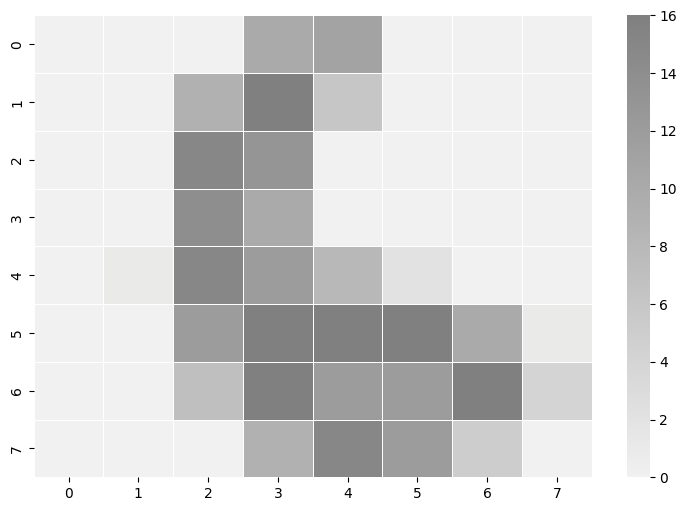

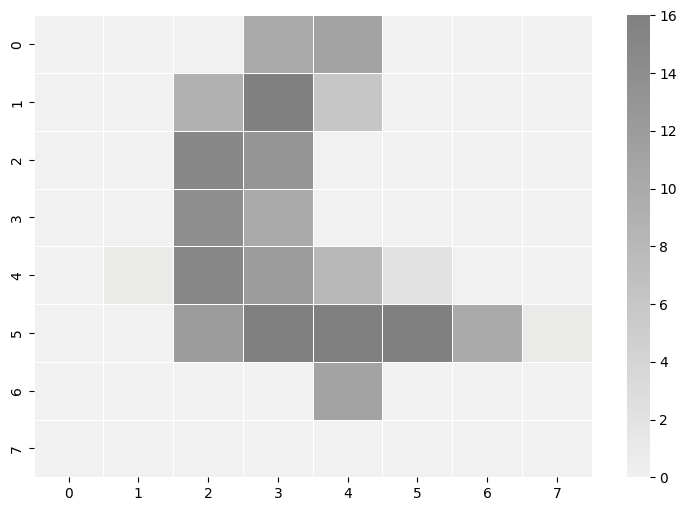

In [29]:
#
# Another example of predicting one pixel
#
row_to_show = 42                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)

# show without pix52
all_pixels[52] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix52
all_pixels[52] = np.round(pix52_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52




<br>

## Your first task:
+ create regressors for _all_ of the pixels on the bottom two rows
+ Use a loop! 16 times is too many for copy-paste-edit!

#### Second, create a slight variation on the visualization above, so that 
+ your system "dreams" all 16 of the bottom two rows of pixels
+ You will be able to see the dreamt digit alongside the real digit
+ <font color="Coral"><b>Show three examples (real and hallucinated!)</b></font> &nbsp;&nbsp; Choose three digits from the dataset and show the original vs. the digit-dreamt version alongside each other / side-by-side in this way. 


In [19]:
#
# Adapt from the previous example:
#

In [66]:
DoR = {}
XaSD = {}
YaSD = {}

for i in range(48,64):
    X_all2 = A[:, 0:48]
    y_all2 = A[:, i] 

    #print(f"y_all (just target values, pix" + str(i) +  " is \n {y_all}") 
    #print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

    from sklearn.model_selection import train_test_split
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all2, y_all2, test_size=0.2)

    X_train_scaled2 = scaler.transform(X_train2) # scale!
    X_test_scaled2 = scaler.transform(X_test2) # scale!

    y_train_scaled2 = y_train2  # the predicted/desired labels are not scaled
    y_test_scaled2 = y_test2  # not using the scaler

    X_all_scaled2 = scaler.transform(X_all2)
    y_all_scaled2 = y_all2.copy() 

    XaSD[i] = X_all_scaled2
    YaSD[i] = y_all_scaled2

    
    #ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])
    #from sklearn.neural_network import MLPRegressor
    
    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate
    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled2, y_train_scaled2)
    #print("++++++++++  TRAINING:   end  +++++++++++++++")

    DoR[ i ] =  nn_regressor 

    if True:
        ascii_table_for_regressor(X_test_scaled2,
                            y_test_scaled2,
                            DoR[ i ],
                            scaler)   # this is our own f'n, above
    # and how it did on the training data!
    # 
    if False:
        ascii_table_for_regressor(X_train_scaled2,
                            y_train_scaled2,
                            DoR[ i ],
                            scaler)   # this is our own f'n, above

    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    #nn_regressor.fit(X_train_scaled2, y_train_scaled2)
    #print("++++++++++  TRAINING:   end  +++++++++++++++")

    #print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
    #print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")


   # if True:
        ascii_table_for_regressor(X_test_scaled2,
                            y_test_scaled2,
                            DoR[ i ],
                            scaler)   # this is our own f'n, above
        # and how it did on the training data!
        # #
    #if False:
        ascii_table_for_regressor(X_train_scaled2,
                            y_train_scaled2,
                            DoR[ i ],
                            scaler)   # this is our own f'n, above

    

    

Iteration 1, loss = 0.06923361
Iteration 2, loss = 0.01423686
Iteration 3, loss = 0.00931512
Iteration 4, loss = 0.00644423
Iteration 5, loss = 0.00519415
Iteration 6, loss = 0.00473845
Iteration 7, loss = 0.00453496
Iteration 8, loss = 0.00470819
Iteration 9, loss = 0.00432439
Iteration 10, loss = 0.00422516
Iteration 11, loss = 0.00417885
Iteration 12, loss = 0.00415032
Iteration 13, loss = 0.00411840
Iteration 14, loss = 0.00408067
Iteration 15, loss = 0.00407335
Iteration 16, loss = 0.00404703
Iteration 17, loss = 0.00403772
Iteration 18, loss = 0.00401940
Iteration 19, loss = 0.00400638
Iteration 20, loss = 0.00401312
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 21, loss = 0.00502836
Iteration 22, loss = 0.00463608
Iteration 23, loss = 0.00431883
Iteration 24, loss = 0.00413383
Iteration 25, loss = 0.00402187
Iteration 26, loss = 0.00397442
Iteration 27, loss = 0.00398058
Iteration 28, loss = 0.00442255

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 4.33702566
Iteration 84, loss = 4.34068007
Iteration 85, loss = 4.28681678
Iteration 86, loss = 4.27149343
Iteration 87, loss = 4.25295604
Iteration 88, loss = 4.25663228
Iteration 89, loss = 4.25317881
Iteration 90, loss = 4.27972453
Iteration 91, loss = 4.25924356
Iteration 92, loss = 4.24258715
Iteration 93, loss = 4.24102042
Iteration 94, loss = 4.25485433
Iteration 95, loss = 4.22573215
Iteration 96, loss = 4.22695904
Iteration 97, loss = 4.23104596
Iteration 98, loss = 4.20051682
Iteration 99, loss = 4.20764635
Iteration 100, loss = 4.19386641
Iteration 101, loss = 4.17591610
Iteration 102, loss = 4.16228226
Iteration 103, loss = 4.16602342
Iteration 104, loss = 4.14171922
Iteration 105, loss = 4.13667417
Iteration 106, loss = 4.10915323
Iteration 107, loss = 4.10886108
Iteration 108, loss = 4.10419225
Iteration 109, loss = 4.09735559
Iteration 110, loss = 4.11949472
Iteration 111, loss = 4.12190896
Iteration 112, loss = 4.14149426
Iteration 113, loss = 4.101

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


          [ 0.00000000e+00  0.00000 ->  +2.550  +3.000    0.450   
          [ 0.00000000e+00  0.00000 ->  -0.097  +0.000    0.097   
          [ 0.00000000e+00  0.00000 ->  +0.179  +0.000    0.179   
          [ 0.00000000e+00  0.00000 ->  +4.242  +9.000    4.758   
          [ 0.00000000e+00  0.00000 ->  +0.545  +3.000    2.455   
          [ 0.00000000e+00  0.00000 ->  +2.546  +2.000    0.546   
          [ 0.00000000e+00  1.00000 ->  +10.032  +12.000    1.968   
          [ 0.00000000e+00  0.00000 ->  +2.550  +1.000    1.550   
          [ 0.00000000e+00  0.00000 ->  +0.250  +0.000    0.250   
          [ 0.  0.  1. 14. 16. 16.  ->  -0.080  +0.000    0.080   
          [ 0.00000000e+00  0.00000 ->  -0.080  +0.000    0.080   
          [ 0.00000000e+00  0.00000 ->  +6.326  +16.000    9.674   
          [ 0.00000000e+00  0.00000 ->  +0.176  +0.000    0.176   
          [ 0.00000000e+00  0.00000 ->  +0.558  +0.000    0.558   
          [ 0.00000000e+00  0.00000 ->  +13.711  +12.000   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


          [ 0.00000000e+00  0.00000 ->  +1.276  +0.000    1.276   
          [ 0.00000000e+00  0.00000 ->  +11.429  +15.000    3.571   
          [ 0.00000000e+00  0.00000 ->  +12.474  +9.000    3.474   
          [ 0.00000000e+00  0.00000 ->  +14.332  +15.000    0.668   
          [ 0.00000000e+00  0.00000 ->  +13.271  +14.000    0.729   
          [ 0.00000000e+00  0.00000 ->  +14.368  +15.000    0.632   
          [ 0.00000000e+00  0.00000 ->  +15.320  +16.000    0.680   
          [ 0.00000000e+00  3.00000 ->  +11.407  +8.000    3.407   
          [ 0.00000000e+00  0.00000 ->  +13.267  +10.000    3.267   
          [ 0.00000000e+00  0.00000 ->  +14.806  +13.000    1.806   
          [ 0.00000000e+00  0.00000 ->  +14.766  +7.000    7.766   
          [ 0.00000000e+00  0.00000 ->  +7.241  +11.000    3.759   
          [ 0.00000000e+00  0.00000 ->  +5.743  +12.000    6.257   
          [ 0.00000000e+00  3.00000 ->  +12.528  +12.000    0.528   
          [ 0.00000000e+00  0.00000 ->  +

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


          [ 0.00000000e+00  0.00000 ->  +3.862  +7.000    3.138   
          [ 0.00000000e+00  2.00000 ->  +10.969  +15.000    4.031   
          [ 0.00000000e+00  4.00000 ->  +9.226  +6.000    3.226   
          [ 0.00000000e+00  0.00000 ->  +0.126  +0.000    0.126   
          [ 0.00000000e+00  0.00000 ->  +13.418  +13.000    0.418   
          [ 0.00000000e+00  0.00000 ->  +0.126  +0.000    0.126   
          [ 0.00000000e+00  0.00000 ->  +12.941  +5.000    7.941   
          [ 0.00000000e+00  0.00000 ->  +7.712  +13.000    5.288   
          [ 0.00000000e+00  5.00000 ->  +13.705  +16.000    2.295   
          [ 0.00000000e+00  0.00000 ->  +13.818  +14.000    0.182   
          [ 0.00000000e+00  0.00000 ->  +3.873  +0.000    3.873   
          [ 0.00000000e+00  0.00000 ->  +8.865  +16.000    7.135   
          [ 0.00000000e+00  0.00000 ->  +13.818  +14.000    0.182   
          [ 0.00000000e+00  2.00000 ->  +13.819  +10.000    3.819   
          [ 0.00000000e+00  5.00000 ->  +0.140 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


          [ 0.00000000e+00  0.00000 ->  -0.043  +0.000    0.043   
          [ 0.00000000e+00  0.00000 ->  +0.045  +0.000    0.045   
          [ 0.00000000e+00  0.00000 ->  -0.033  +0.000    0.033   
          [ 0.00000000e+00  0.00000 ->  -0.536  +0.000    0.536   
          [ 0.00000000e+00  0.00000 ->  +0.091  +0.000    0.091   
          [ 0.00000000e+00  0.00000 ->  +0.029  +0.000    0.029   
          [ 0.00000000e+00  0.00000 ->  +0.098  +0.000    0.098   
          [ 0.00000000e+00  0.00000 ->  -0.103  +0.000    0.103   
          [ 0.00000000e+00  1.00000 ->  -0.076  +0.000    0.076   
          [ 0.00000000e+00  0.00000 ->  -0.390  +0.000    0.390   
          [ 0.00000000e+00  0.00000 ->  +0.078  +0.000    0.078   
          [ 0.00000000e+00  0.00000 ->  +0.032  +0.000    0.032   
          [ 0.00000000e+00  0.00000 ->  -0.097  +0.000    0.097   
          [ 0.00000000e+00  0.00000 ->  -0.047  +0.000    0.047   
          [ 0.00000000e+00  0.00000 ->  -0.000  +0.000    0.00

### Pixel 53

In [68]:
# a final nn_regressor for pix53

pix53_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
pix53_final_regressor.fit(XaSD[53], YaSD[53])
print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

print(f"The (sq) prediction error (the loss) is {pix53_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix53_final_regressor.loss_**0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++




++++++++++  TRAINING:   end  +++++++++++++++


The (sq) prediction error (the loss) is 3.32504081100868
So, the 'average' error per pixel is 1.823469443398677


In [69]:
pix53_predicted = predict_from_model(first48pixels,pix53_final_regressor)
pix53_actual = A[row_to_show,53]
print(f"pix53 [predicted] vs. actual:  {pix53_predicted} vs. {pix53_actual}")

pix53 [predicted] vs. actual:  [13.87760463] vs. 15.0


The numeral is a 5

pix53 [predicted] vs. actual:  [13.87760463] 15.0


/var/folders/qd/kdx5b1q953l5hkqzq5l80bgw0000gn/T/ipykernel_55916/3858657647.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[53] = np.round(pix53_predicted)    # include this one


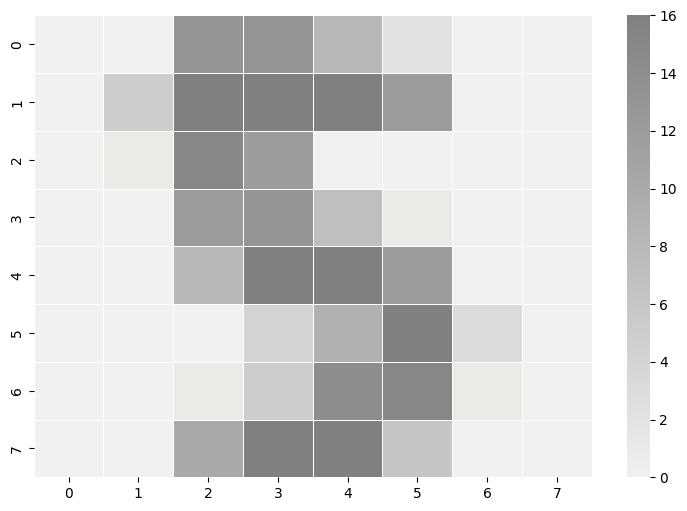

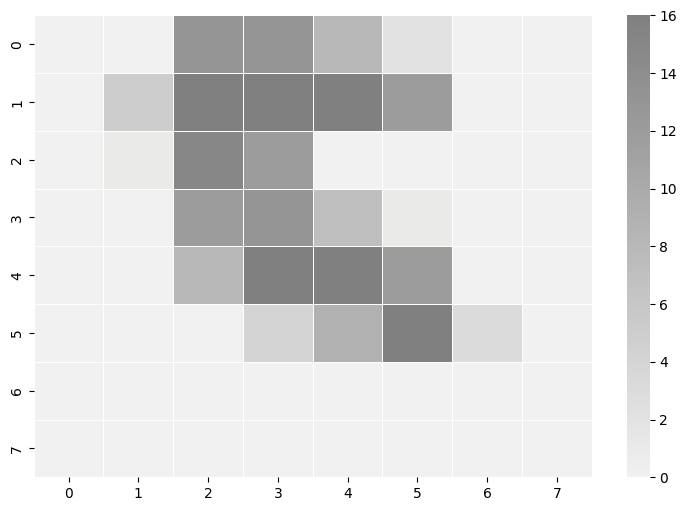

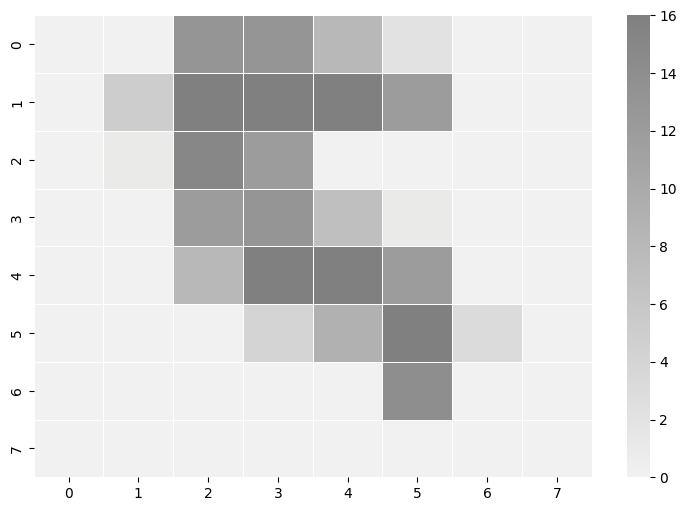

In [ ]:
row_to_show = 50                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix53_predicted = predict_from_model(first48pixels,pix53_final_regressor)
pix53_actual = A[row_to_show,53]

print(f"pix53 [predicted] vs. actual:  {pix53_predicted} {pix53_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
# show without pix53
all_pixels[53] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix53
all_pixels[53] = np.round(pix53_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52

### Pixel 54

In [ ]:
pix54_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')
pix54_final_regressor.fit(XaSD[54], YaSD[54])

print(f"The (sq) prediction error (the loss) is {pix54_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix54_final_regressor.loss_**0.5}")

The (sq) prediction error (the loss) is 1.5648835538086527
So, the 'average' error per pixel is 1.2509530581954915


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
pix54_predicted = predict_from_model(first48pixels,pix54_final_regressor)
pix54_actual = A[row_to_show,54]
print(f"pix53 [predicted] vs. actual:  {pix54_predicted} vs. {pix54_actual}")

pix53 [predicted] vs. actual:  [4.88534326] vs. 1.0


The numeral is a 6

pix54 [predicted] vs. actual:  [12.65944021] 14.0


/var/folders/qd/kdx5b1q953l5hkqzq5l80bgw0000gn/T/ipykernel_55916/919007326.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[54] = np.round(pix54_predicted)    # include this one


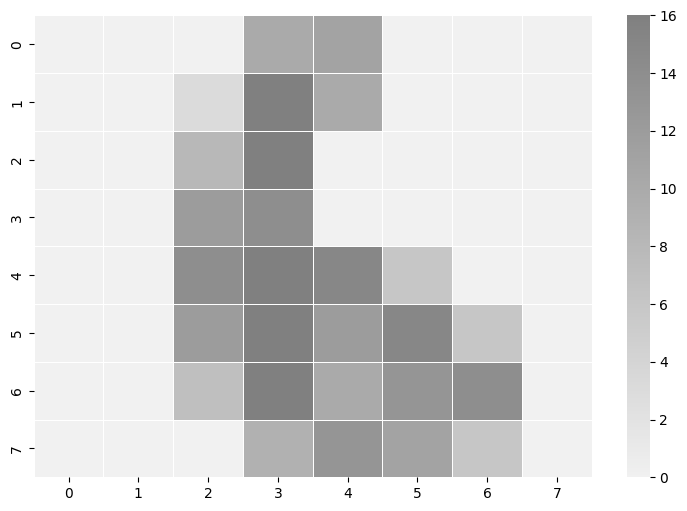

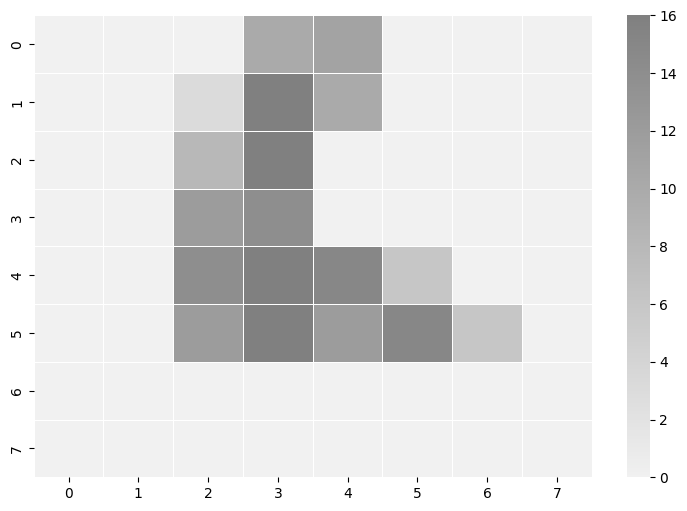

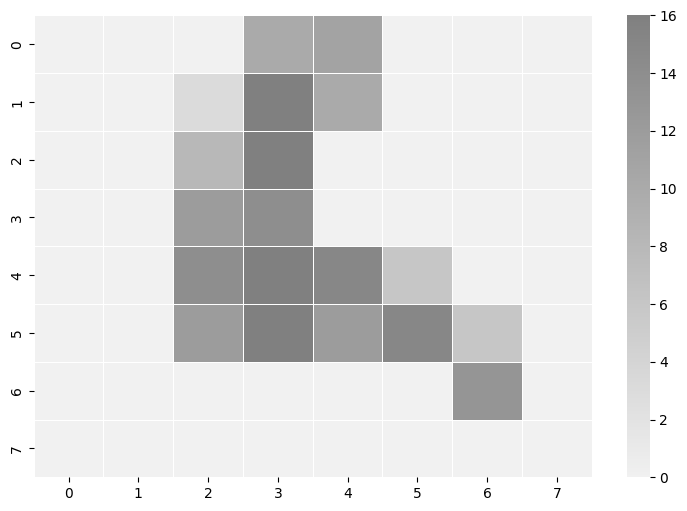

In [76]:
row_to_show = 64                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix54_predicted = predict_from_model(first48pixels,pix54_final_regressor)
pix54_actual = A[row_to_show,54]

print(f"pix54 [predicted] vs. actual:  {pix54_predicted} {pix54_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
# show without pix53
all_pixels[54] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix53
all_pixels[54] = np.round(pix54_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52

### Pixel 55

In [77]:
pix55_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')
pix55_final_regressor.fit(XaSD[55], YaSD[55])

print(f"The (sq) prediction error (the loss) is {pix55_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix55_final_regressor.loss_**0.5}")

The (sq) prediction error (the loss) is 0.05053636936441405
So, the 'average' error per pixel is 0.22480295675193876


In [78]:
pix55_predicted = predict_from_model(first48pixels,pix55_final_regressor)
pix55_actual = A[row_to_show,55]
print(f"pix55 [predicted] vs. actual:  {pix55_predicted} vs. {pix55_actual}")

pix55 [predicted] vs. actual:  [0.05344578] vs. 0.0


The numeral is a 6

pix55 [predicted] vs. actual:  [0.05344578] 0.0


/var/folders/qd/kdx5b1q953l5hkqzq5l80bgw0000gn/T/ipykernel_55916/3241401830.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[55] = np.round(pix54_predicted)    # include this one


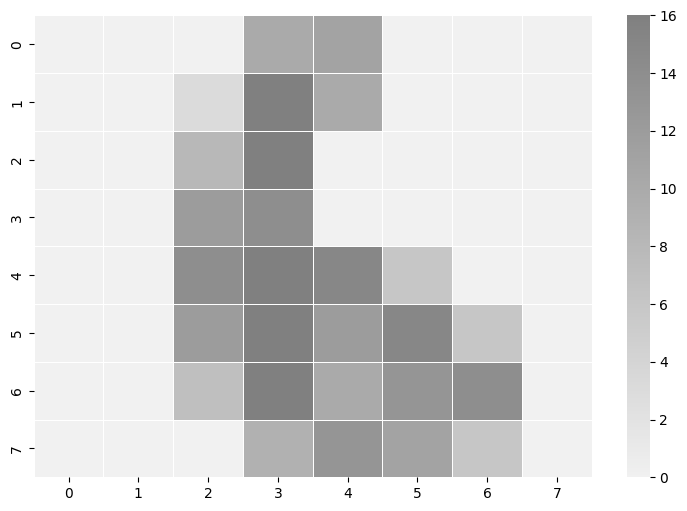

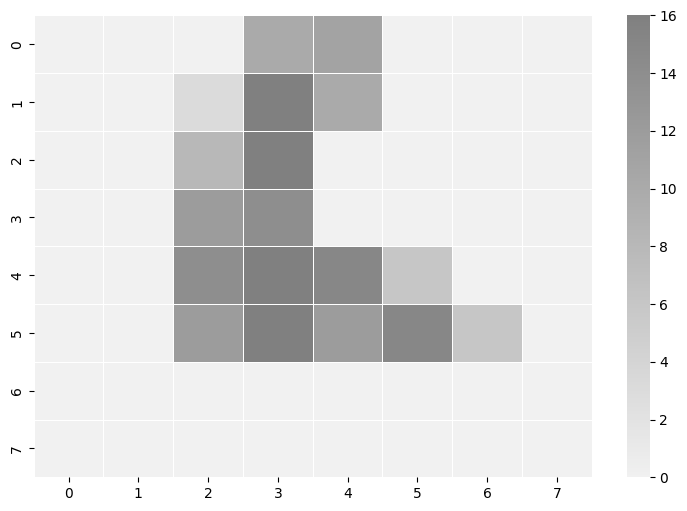

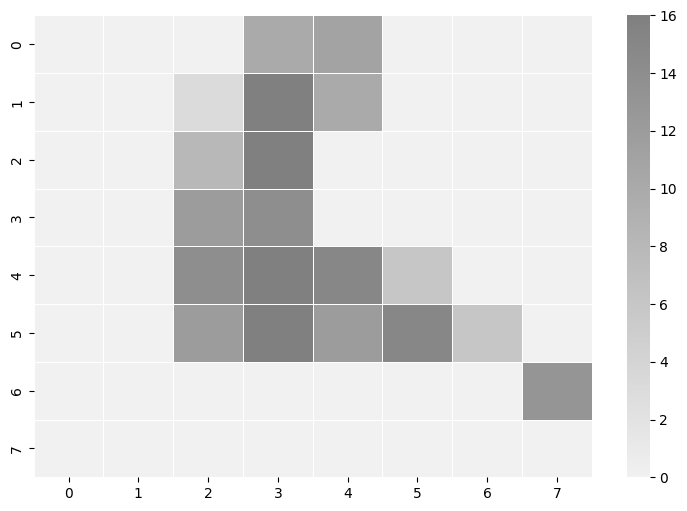

In [79]:
row_to_show = 64                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix55_predicted = predict_from_model(first48pixels,pix55_final_regressor)
pix55_actual = A[row_to_show,55]

print(f"pix55 [predicted] vs. actual:  {pix55_predicted} {pix55_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
# show without pix53
all_pixels[55] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix53
all_pixels[55] = np.round(pix54_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52

## Second task:

#### Then, predict __four__ rows, instead of two
+ Then, repeat/expand this process so that your code predicts the bottom **four** rows, instead of two
+ This time, you'll train and create 32 regressors (wow!)
+ Again, choose three digits (perhaps the same ones) and show what the system dreams for their four bottom rows vs. the actual!
+ For EC, try the bottom <b>six</b> rows -- or try the actually-unknown digits in <tt>partial_digits.csv</tt> -- and, perhaps, then try to classify the full digits the system generates from those partial ones... !

In [97]:
DoR2 = {}
XaSD2 = {}
YaSD2 = {}

for i in range(32,64):
    X_all3 = A[:, 0:32]
    y_all3 = A[:, i] 

    #print(f"y_all (just target values, pix" + str(i) +  " is \n {y_all}") 
    #print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

    from sklearn.model_selection import train_test_split
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X_all3, y_all3, test_size=0.2)

    scaler32 = StandardScaler()
    scaler32.fit(X_train3)  # Sc

    X_train_scaled3 = scaler32.transform(X_train3) # scale!
    X_test_scaled3 = scaler32.transform(X_test3) # scale!

    y_train_scaled3 = y_train3  # the predicted/desired labels are not scaled
    y_test_scaled3 = y_test3  # not using the scaler

    X_all_scaled3 = scaler32.transform(X_all3)
    y_all_scaled3 = y_all3.copy() 

    XaSD2[i] = X_all_scaled3
    YaSD2[i] = y_all_scaled3

    
    #ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])
    #from sklearn.neural_network import MLPRegressor
    
    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate
    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled3, y_train_scaled3)
    #print("++++++++++  TRAINING:   end  +++++++++++++++")

    DoR2[ i ] =  nn_regressor 

    if True:
        ascii_table_for_regressor(X_test_scaled3,
                            y_test_scaled3,
                            DoR2[ i ],
                            scaler32)   # this is our own f'n, above
    # and how it did on the training data!
    # 
    if False:
        ascii_table_for_regressor(X_train_scaled2,
                            y_train_scaled2,
                            DoR[ i ],
                            scaler)   # this is our own f'n, above

Iteration 1, loss = 0.14853825
Iteration 2, loss = 0.00648426
Iteration 3, loss = 0.00497507
Iteration 4, loss = 0.00220039
Iteration 5, loss = 0.00085841
Iteration 6, loss = 0.00033821
Iteration 7, loss = 0.00022251
Iteration 8, loss = 0.00014245
Iteration 9, loss = 0.00011197
Iteration 10, loss = 0.00008961
Iteration 11, loss = 0.00007219
Iteration 12, loss = 0.00006049
Iteration 13, loss = 0.00005044
Iteration 14, loss = 0.00004208
Iteration 15, loss = 0.00003726
Iteration 16, loss = 0.00003181
Iteration 17, loss = 0.00002898
Iteration 18, loss = 0.00002652
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 19, loss = 0.00002412
Iteration 20, loss = 0.00002304
Iteration 21, loss = 0.00002234
Iteration 22, loss = 0.00002190
Iteration 23, loss = 0.00002168
Iteration 24, loss = 0.00002132
Iteration 25, loss = 0.00002102
Iteration 26, loss = 0.00002075
Iteration 27, loss = 0.00002056
Iteration 28, loss = 0.00002028

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 7.70364159
Iteration 37, loss = 7.63381455
Iteration 38, loss = 7.57329487
Iteration 39, loss = 7.56706221
Iteration 40, loss = 7.55148236
Iteration 41, loss = 7.50934659
Iteration 42, loss = 7.48162163
Iteration 43, loss = 7.44143541
Iteration 44, loss = 7.40046309
Iteration 45, loss = 7.38058457
Iteration 46, loss = 7.36331367
Iteration 47, loss = 7.37167109
Iteration 48, loss = 7.34643600
Iteration 49, loss = 7.32116380
Iteration 50, loss = 7.30901180
Iteration 51, loss = 7.28576175
Iteration 52, loss = 7.26626959
Iteration 53, loss = 7.25973875
Iteration 54, loss = 7.24336579
Iteration 55, loss = 7.23275915
Iteration 56, loss = 7.21374690
Iteration 57, loss = 7.21625190
Iteration 58, loss = 7.18627200
Iteration 59, loss = 7.15401247
Iteration 60, loss = 7.14866376
Iteration 61, loss = 7.15140286
Iteration 62, loss = 7.14135769
Iteration 63, loss = 7.13461168
Iteration 64, loss = 7.13123353
Iteration 65, loss = 7.11740516
Iteration 66, loss = 7.10053548
Iteratio

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 12.22790836
Iteration 37, loss = 11.87849715
Iteration 38, loss = 12.10559965
Iteration 39, loss = 11.97218215
Iteration 40, loss = 11.97381806
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 41, loss = 11.58662090
Iteration 42, loss = 11.50594001
Iteration 43, loss = 10.95417907
Iteration 44, loss = 10.71422865
Iteration 45, loss = 10.64034988
Iteration 46, loss = 10.57003790
Iteration 47, loss = 10.41153836
Iteration 48, loss = 10.44598609
Iteration 49, loss = 10.19470760
Iteration 50, loss = 10.16839048
Iteration 51, loss = 10.14794832
Iteration 52, loss = 9.97367806
Iteration 53, loss = 10.00616074
Iteration 54, loss = 9.95976131
Iteration 55, loss = 9.88971487
Iteration 56, loss = 9.97953865
Iteration 57, loss = 9.92441182
Iteration 58, loss = 9.91947033
Iteration 59, loss = 9.88332072
Iteration 60, loss = 9.74099470
Iteration 61, loss = 9.66635538
Iteration 62, loss = 9.67295107
Itera

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 2.70988483
Iteration 44, loss = 2.63166176
Iteration 45, loss = 2.58871993
Iteration 46, loss = 2.56803321
Iteration 47, loss = 2.52767235
Iteration 48, loss = 2.50446444
Iteration 49, loss = 2.49369365
Iteration 50, loss = 2.47632071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 51, loss = 2.45685530
Iteration 52, loss = 2.46762626
Iteration 53, loss = 2.45509441
Iteration 54, loss = 2.43750014
Iteration 55, loss = 2.42272129
Iteration 56, loss = 2.41543950
Iteration 57, loss = 2.40922691
Iteration 58, loss = 2.40496950
Iteration 59, loss = 2.39595432
Iteration 60, loss = 2.39030653
Iteration 61, loss = 2.38341446
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 62, loss = 2.38020367
Iteration 63, loss = 2.38951004
Iteration 64, loss = 2.38711757
Iteration 65, loss = 2.38172849
Iteration 66, loss = 2.37835901
Iter

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.00005029
Iteration 41, loss = 0.00005009
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 42, loss = 0.00004995
Iteration 43, loss = 0.00004987
Iteration 44, loss = 0.00004982
Iteration 45, loss = 0.00004979
Iteration 46, loss = 0.00004975
Iteration 47, loss = 0.00004973
Iteration 48, loss = 0.00004969
Iteration 49, loss = 0.00004967
Iteration 50, loss = 0.00004964
Iteration 51, loss = 0.00004961
Iteration 52, loss = 0.00004958
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000160
Iteration 53, loss = 0.00004955
Iteration 54, loss = 0.00004954
Iteration 55, loss = 0.00004953
Iteration 56, loss = 0.00004952
Iteration 57, loss = 0.00004952
Iteration 58, loss = 0.00004951
Iteration 59, loss = 0.00004950
Iteration 60, loss = 0.00004950
Iteration 61, loss = 0.00004949
Iteration 62, loss = 0.00004949
Iteration 63, loss = 0.00004948
Trai

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 150, loss = 9.21472502
Iteration 151, loss = 9.22252205
Iteration 152, loss = 9.21803784
Iteration 153, loss = 9.21558975
Iteration 154, loss = 9.21665194
Iteration 155, loss = 9.20719186
Iteration 156, loss = 9.21540143
Iteration 157, loss = 9.19213267
Iteration 158, loss = 9.21412128
Iteration 159, loss = 9.20376046
Iteration 160, loss = 9.19903992
Iteration 161, loss = 9.17588655
Iteration 162, loss = 9.18045729
Iteration 163, loss = 9.20188176
Iteration 164, loss = 9.19154194
Iteration 165, loss = 9.17618504
Iteration 166, loss = 9.17011283
Iteration 167, loss = 9.17776265
Iteration 168, loss = 9.18279258
Iteration 169, loss = 9.18413154
Iteration 170, loss = 9.17409352
Iteration 171, loss = 9.18001959
Iteration 172, loss = 9.16892010
Iteration 173, loss = 9.17063857
Iteration 174, loss = 9.30629642
Iteration 175, loss = 9.32799593
Iteration 176, loss = 9.28650503
Iteration 177, loss = 9.24205234
Iteration 178, loss = 9.21724959
Iteration 179, loss = 9.23728239
Iteration 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 148, loss = 11.25306093
Iteration 149, loss = 11.21530145
Iteration 150, loss = 11.20721177
Iteration 151, loss = 11.20522934
Iteration 152, loss = 11.22119888
Iteration 153, loss = 11.22322799
Iteration 154, loss = 11.24210983
Iteration 155, loss = 11.25470777
Iteration 156, loss = 11.24563262
Iteration 157, loss = 11.24045119
Iteration 158, loss = 11.26386110
Iteration 159, loss = 11.30250650
Iteration 160, loss = 11.26690606
Iteration 161, loss = 11.26812734
Iteration 162, loss = 11.23610276
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 163, loss = 11.20755569
Iteration 164, loss = 11.25173079
Iteration 165, loss = 11.25527315
Iteration 166, loss = 11.22953000
Iteration 167, loss = 11.22379761
Iteration 168, loss = 11.21083488
Iteration 169, loss = 11.20647756
Iteration 170, loss = 11.20184194
Iteration 171, loss = 11.19821590
Iteration 172, loss = 11.19231363
Iteration 173, loss = 11.18998796
It

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 149, loss = 4.28650069
Iteration 150, loss = 4.28966303
Iteration 151, loss = 4.28811816
Iteration 152, loss = 4.29004841
Iteration 153, loss = 4.28952455
Iteration 154, loss = 4.28521000
Iteration 155, loss = 4.28775164
Iteration 156, loss = 4.28935982
Iteration 157, loss = 4.28721127
Iteration 158, loss = 4.28093546
Iteration 159, loss = 4.28000131
Iteration 160, loss = 4.28438090
Iteration 161, loss = 4.28235146
Iteration 162, loss = 4.28362464
Iteration 163, loss = 4.27974334
Iteration 164, loss = 4.28215977
Iteration 165, loss = 4.27890951
Iteration 166, loss = 4.27234238
Iteration 167, loss = 4.27699188
Iteration 168, loss = 4.27456656
Iteration 169, loss = 4.27520687
Iteration 170, loss = 4.27345134
Iteration 171, loss = 4.27088211
Iteration 172, loss = 4.26928189
Iteration 173, loss = 4.26636069
Iteration 174, loss = 4.26620075
Iteration 175, loss = 4.26799064
Iteration 176, loss = 4.26259631
Iteration 177, loss = 4.26416346
Iteration 178, loss = 4.27427204
Iteration 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 155, loss = 0.02336111
Iteration 156, loss = 0.02334438
Iteration 157, loss = 0.02332533
Iteration 158, loss = 0.02325584
Iteration 159, loss = 0.02324622
Iteration 160, loss = 0.02320762
Iteration 161, loss = 0.02318667
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000160
Iteration 162, loss = 0.02317272
Iteration 163, loss = 0.02315820
Iteration 164, loss = 0.02315234
Iteration 165, loss = 0.02314688
Iteration 166, loss = 0.02314731
Iteration 167, loss = 0.02314448
Iteration 168, loss = 0.02314257
Iteration 169, loss = 0.02313884
Iteration 170, loss = 0.02313520
Iteration 171, loss = 0.02313212
Iteration 172, loss = 0.02312842
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000032
Iteration 173, loss = 0.02312472
Iteration 174, loss = 0.02312260
Iteration 175, loss = 0.02312183
Iteration 176, loss = 0.02312095
Iteration 177, loss = 0.02312008
Iteration 178

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 152, loss = 8.76055517
Iteration 153, loss = 8.76991204
Iteration 154, loss = 8.76846301
Iteration 155, loss = 8.76368813
Iteration 156, loss = 8.75870570
Iteration 157, loss = 8.76487698
Iteration 158, loss = 8.76233110
Iteration 159, loss = 8.75403444
Iteration 160, loss = 8.75041582
Iteration 161, loss = 8.74912922
Iteration 162, loss = 8.76303811
Iteration 163, loss = 8.76402565
Iteration 164, loss = 8.78382813
Iteration 165, loss = 8.77409636
Iteration 166, loss = 8.76080994
Iteration 167, loss = 8.73827199
Iteration 168, loss = 8.75358579
Iteration 169, loss = 8.74201105
Iteration 170, loss = 8.73882266
Iteration 171, loss = 8.76322727
Iteration 172, loss = 8.73674713
Iteration 173, loss = 8.74843443
Iteration 174, loss = 8.74831457
Iteration 175, loss = 8.74172295
Iteration 176, loss = 8.74912866
Iteration 177, loss = 8.76266854
Iteration 178, loss = 8.75279822
Iteration 179, loss = 8.74197303
Iteration 180, loss = 8.74566008
Iteration 181, loss = 8.74690076
Iteration 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.20418474
Iteration 40, loss = 0.20390734
Iteration 41, loss = 0.19309753
Iteration 42, loss = 0.18651498
Iteration 43, loss = 0.18814341
Iteration 44, loss = 0.18501324
Iteration 45, loss = 0.17824180
Iteration 46, loss = 0.18435356
Iteration 47, loss = 0.17600546
Iteration 48, loss = 0.17324595
Iteration 49, loss = 0.16912095
Iteration 50, loss = 0.17699006
Iteration 51, loss = 0.17569925
Iteration 52, loss = 0.23568586
Iteration 53, loss = 0.26915160
Iteration 54, loss = 0.25410734
Iteration 55, loss = 0.23570729
Iteration 56, loss = 0.23531629
Iteration 57, loss = 0.22481906
Iteration 58, loss = 0.20126415
Iteration 59, loss = 0.19633193
Iteration 60, loss = 0.24691406
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 61, loss = 0.29851069
Iteration 62, loss = 0.27695436
Iteration 63, loss = 0.22025253
Iteration 64, loss = 0.19862887
Iteration 65, loss = 0.21321608
Iteration 66, loss = 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 127, loss = 2.24661854
Iteration 128, loss = 2.24661733
Iteration 129, loss = 2.24661451
Iteration 130, loss = 2.24661379
Iteration 131, loss = 2.24661182
Iteration 132, loss = 2.24661035
Iteration 133, loss = 2.24660840
Iteration 134, loss = 2.24660708
Iteration 135, loss = 2.24660487
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 136, loss = 2.24660100
Iteration 137, loss = 2.24660013
Iteration 138, loss = 2.24659906
Iteration 139, loss = 2.24659854
Iteration 140, loss = 2.24659822
Iteration 141, loss = 2.24659766
Iteration 142, loss = 2.24659734
Iteration 143, loss = 2.24659691
Iteration 144, loss = 2.24659640
Iteration 145, loss = 2.24659583
Iteration 146, loss = 2.24659547
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
                             input  ->   pred    des.    absdiff  
          [0.0000000e+00 1.0000000e ->  +14.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


          [ 0.  0.  3. 12. 11.  1.  ->  +4.197  +6.000    1.803   
          [ 0.00000000e+00  0.00000 ->  +0.775  +0.000    0.775   
          [ 0.00000000e+00  0.00000 ->  +1.372  +0.000    1.372   
          [ 0.00000000e+00  0.00000 ->  +11.786  +0.000    11.786  
          [ 0.  3. 13. 16. 13.  0.  ->  +8.676  +0.000    8.676   
          [ 0.00000000e+00  0.00000 ->  +3.689  +0.000    3.689   
          [ 0.00000000e+00  0.00000 ->  +1.262  +0.000    1.262   
          [ 0.00000000e+00  0.00000 ->  +3.430  +2.000    1.430   
          [ 0.00000000e+00  0.00000 ->  +11.928  +16.000    4.072   
          [ 0.  0.  5. 13. 13.  5.  ->  +3.024  +9.000    5.976   
          [ 0.00000000e+00  0.00000 ->  -0.652  +1.000    1.652   
          [ 0.  0.  4. 15. 14. 12.  ->  +1.262  +0.000    1.262   
          [0.0000000e+00 0.0000000e ->  +9.761  +0.000    9.761   
          [ 0.00000000e+00  0.00000 ->  +11.438  +16.000    4.562   
          [ 0.00000000e+00  0.00000 ->  +8.770  +0.000   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


### Build the regressor for the pixels in the bottom four rows

In [99]:
final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=400, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

for j in range(32,64):
    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    final_regressor.fit(XaSD2[j],YaSD2[j])
    #print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")
    
    #print(f"The (sq) prediction error (the loss) is {final_regressor.loss_}") 
    #print(f"So, the 'average' error per pixel is {final_regressor.loss_**0.5}")
    pix_predicted = predict_from_model(first32pixels,final_regressor)
    pix_actual = A[row_to_show,j]
    print(f"pix{j} [predicted] vs. actual: {pix_predicted} vs. {pix_actual}")


pix32 [predicted] vs. actual: [-0.00349581] vs. 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix33 [predicted] vs. actual: [2.17289236] vs. 0.0
pix34 [predicted] vs. actual: [6.59247406] vs. 14.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix35 [predicted] vs. actual: [11.84775818] vs. 16.0
pix36 [predicted] vs. actual: [13.02872247] vs. 15.0
pix37 [predicted] vs. actual: [13.73409259] vs. 6.0
pix38 [predicted] vs. actual: [1.84918101] vs. 0.0
pix39 [predicted] vs. actual: [-0.00138662] vs. 0.0
pix40 [predicted] vs. actual: [0.05336005] vs. 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix41 [predicted] vs. actual: [3.55510105] vs. 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix42 [predicted] vs. actual: [3.76437414] vs. 12.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix43 [predicted] vs. actual: [8.83000875] vs. 16.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix44 [predicted] vs. actual: [12.52730503] vs. 12.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix45 [predicted] vs. actual: [10.16315877] vs. 15.0
pix46 [predicted] vs. actual: [0.97969977] vs. 6.0
pix47 [predicted] vs. actual: [-0.04378645] vs. 0.0
pix48 [predicted] vs. actual: [0.03628053] vs. 0.0
pix49 [predicted] vs. actual: [0.71728523] vs. 0.0
pix50 [predicted] vs. actual: [6.11516908] vs. 7.0
pix51 [predicted] vs. actual: [12.34763592] vs. 16.0
pix52 [predicted] vs. actual: [11.73005954] vs. 10.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix53 [predicted] vs. actual: [1.41074591] vs. 13.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix54 [predicted] vs. actual: [0.91945229] vs. 14.0
pix55 [predicted] vs. actual: [0.08803989] vs. 0.0
pix56 [predicted] vs. actual: [-0.00283594] vs. 0.0
pix57 [predicted] vs. actual: [4.4934409] vs. 0.0
pix58 [predicted] vs. actual: [12.15782624] vs. 0.0
pix59 [predicted] vs. actual: [14.99811488] vs. 9.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


pix60 [predicted] vs. actual: [9.5870245] vs. 13.0
pix61 [predicted] vs. actual: [5.28374561] vs. 11.0
pix62 [predicted] vs. actual: [0.07191174] vs. 6.0
pix63 [predicted] vs. actual: [0.20030631] vs. 0.0


### Actuall digit vs Predicted digit

The numeral is a 6



ValueError: X has 32 features, but MLPRegressor is expecting 48 features as input.

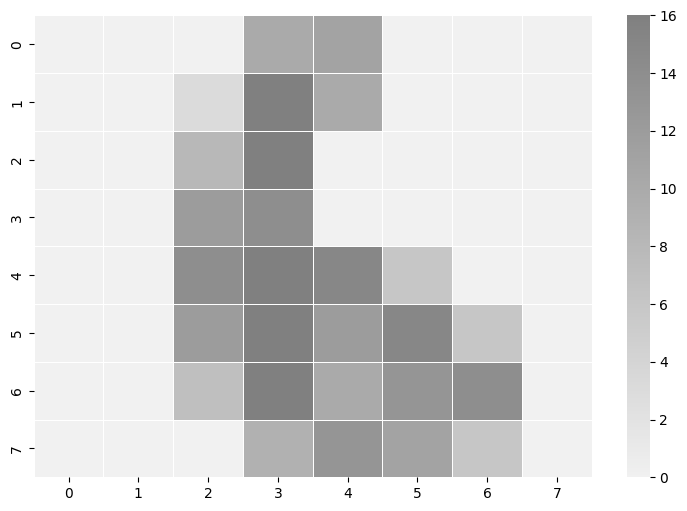

In [95]:
import numpy as np

def predict_from_model(input_pixels, model):
    """
    Ensure the input is a 2D array of shape (1, n_features),
    then call the model's predict method.
    """
    # Convert to numpy array (if not already) and force it to 2D.
    input_pixels = np.array(input_pixels)
    if input_pixels.ndim == 1:
        input_pixels = input_pixels.reshape(1, -1)
    # Now predict (the output is assumed to be an array with one element)
    return model.predict(input_pixels)

# ----- Start of main code ----- #

# Suppose A is your data array where each row is a flattened 64-pixel image.
# We assume column 64 holds the numeral label.
row_to_show = 64  
original_image = A[row_to_show, 0:64].copy()  # shape: (64,)

# Display the complete original image for reference.
print(f"The numeral is a {int(A[row_to_show, 64])}\n")
show_digit(original_image)

# Get the top half of the image (first 32 pixels).
# We'll keep this as a 1D array for later concatenation.
observed_top_pixels = original_image[0:32].copy()  # shape: (32,)

# Prepare a 2D version of the top pixels for passing to the model.
observed_top_pixels_2d = observed_top_pixels.reshape(1, -1)  # shape: (1, 32)

predicted_bottom_pixels = []  # To store predicted values for pixels 32 through 63.

# Loop through each pixel index of the missing (bottom four rows) portion.
for j in range(32, 64):
    # Train the regressor for pixel j.
    final_regressor.fit(XaSD2[j], YaSD2[j])
    
    # Predict for pixel j using the 2D version of top pixels.
    pixel_prediction = predict_from_model(observed_top_pixels_2d, final_regressor)
    
    # If the prediction returns an array (even with one element), extract the scalar.
    predicted_value = np.round(pixel_prediction[0])
    
    predicted_bottom_pixels.append(predicted_value)
    print(f"pix{j} [predicted] vs. actual: {predicted_value} vs. {original_image[j]}")

# Convert the list of predicted bottom pixels into a 1D numpy array of length 32.
predicted_bottom_pixels = np.array(predicted_bottom_pixels).flatten()

# Reconstruct the full predicted image by concatenating the observed top half with the predicted bottom half.
# Both parts are 1D (length 32 each), so the result is a 1D array with 64 elements.
predicted_image = np.concatenate([observed_top_pixels, predicted_bottom_pixels])

# Optionally, if your display function expects an 8x8 array, you can reshape it:
# predicted_image = predicted_image.reshape(8, 8)
show_digit(predicted_image)


The numeral is a 6



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[ 0.  0. 14. 14. 13.  4.  1.  0. -0.  3.  7. 16. 12. 13.  1. -0. -0.  0.
  1. 15. 12.  6.  1.  0.  0. -0.  8. 14. 14.  7.  0.  0.]


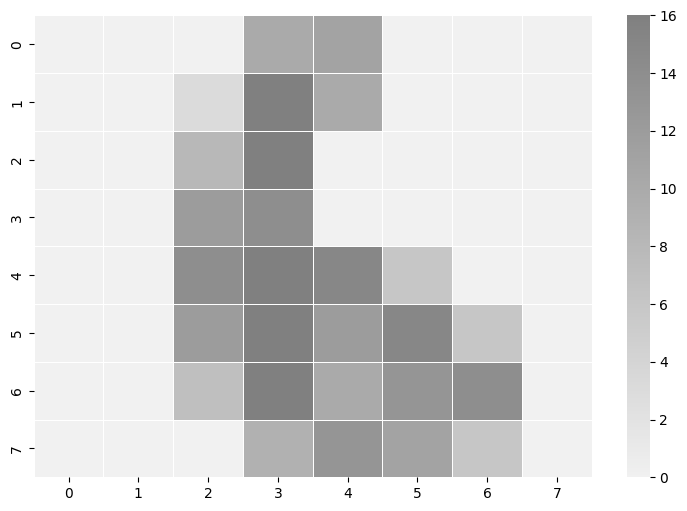

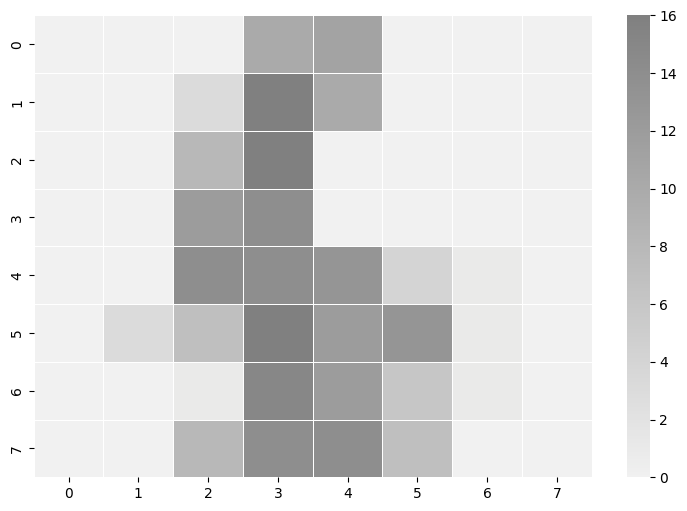

In [110]:
# Suppose A is your data array, and row_to_show is the index of the image you want to work with.
# Note that we assume each image is represented as a flat vector of 64 pixels.
row_to_show = 64  
original_image = A[row_to_show, 0:64].copy()

# Display the original complete image.
# (Assuming that A[row_to_show,64] holds the numeral label; adjust if needed.)
print(f"The numeral is a {int(A[row_to_show, 64])}\n")
show_digit(original_image)  # Show the full original image

top_pixels = original_image[0:32]  
#top_pixels = top_pixels.reshape(1, -1)
predicted_bottom_pixels = []

# Loop through each pixel index of the missing (bottom four rows) portion.
for j in range(32, 64):
    final_regressor.fit(XaSD2[j], YaSD2[j])
    pixel_prediction = predict_from_model(top_pixels, final_regressor)
    predicted_bottom_pixels.append((np.round(pixel_prediction)))
    #print(f"pix{j} [predicted] vs. actual: {pixel_prediction} vs. {original_image[j]}")
print(np.array(predicted_bottom_pixels).flatten())

# Combine the unchanged top part with the predicted bottom part to form a full predicted image.
predicted_image = np.concatenate([top_pixels, np.array(predicted_bottom_pixels).flatten()])

# Display the image with the predicted bottom four rows.
show_digit(predicted_image)


The numeral is a 1



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

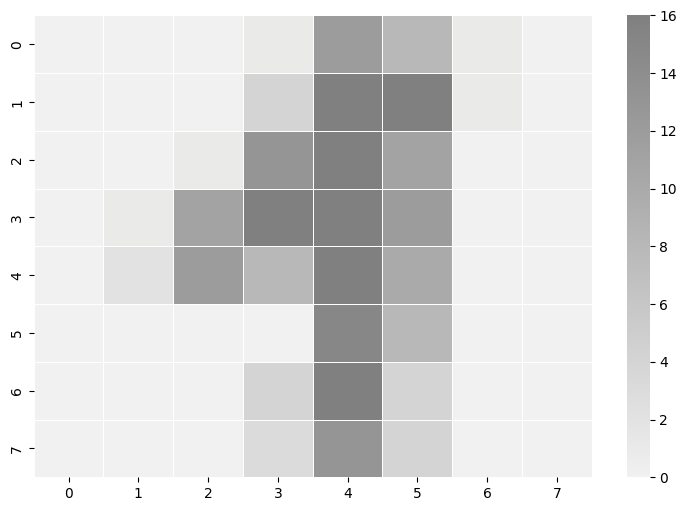

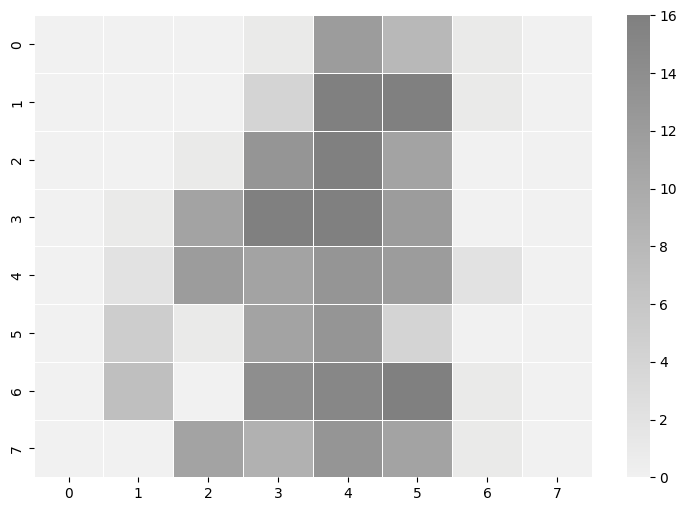

In [112]:
# Suppose A is your data array, and row_to_show is the index of the image you want to work with.
# Note that we assume each image is represented as a flat vector of 64 pixels.
row_to_show = 66  
original_image = A[row_to_show, 0:64].copy()

# Display the original complete image.
# (Assuming that A[row_to_show,64] holds the numeral label; adjust if needed.)
print(f"The numeral is a {int(A[row_to_show, 64])}\n")
show_digit(original_image)  # Show the full original image

top_pixels = original_image[0:32]  
#top_pixels = top_pixels.reshape(1, -1)
predicted_bottom_pixels = []

# Loop through each pixel index of the missing (bottom four rows) portion.
for j in range(32, 64):
    final_regressor.fit(XaSD2[j], YaSD2[j])
    pixel_prediction = predict_from_model(top_pixels, final_regressor)
    predicted_bottom_pixels.append((np.round(pixel_prediction)))
    #print(f"pix{j} [predicted] vs. actual: {pixel_prediction} vs. {original_image[j]}")
#print(np.array(predicted_bottom_pixels).flatten())

# Combine the unchanged top part with the predicted bottom part to form a full predicted image.
predicted_image = np.concatenate([top_pixels, np.array(predicted_bottom_pixels).flatten()])

# Display the image with the predicted bottom four rows.
show_digit(predicted_image)


The numeral is a 7



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

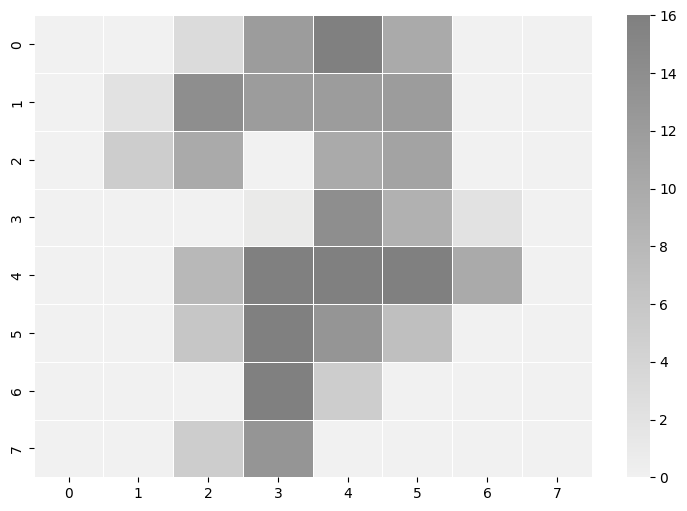

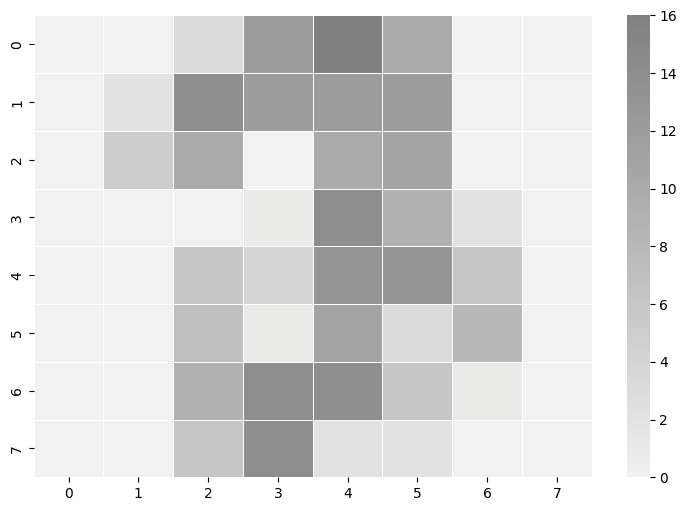

In [113]:
# Suppose A is your data array, and row_to_show is the index of the image you want to work with.
# Note that we assume each image is represented as a flat vector of 64 pixels.
row_to_show = 70  
original_image = A[row_to_show, 0:64].copy()

# Display the original complete image.
# (Assuming that A[row_to_show,64] holds the numeral label; adjust if needed.)
print(f"The numeral is a {int(A[row_to_show, 64])}\n")
show_digit(original_image)  # Show the full original image

top_pixels = original_image[0:32]  
#top_pixels = top_pixels.reshape(1, -1)
predicted_bottom_pixels = []

# Loop through each pixel index of the missing (bottom four rows) portion.
for j in range(32, 64):
    final_regressor.fit(XaSD2[j], YaSD2[j])
    pixel_prediction = predict_from_model(top_pixels, final_regressor)
    predicted_bottom_pixels.append((np.round(pixel_prediction)))
    #print(f"pix{j} [predicted] vs. actual: {pixel_prediction} vs. {original_image[j]}")
#print(np.array(predicted_bottom_pixels).flatten())

# Combine the unchanged top part with the predicted bottom part to form a full predicted image.
predicted_image = np.concatenate([top_pixels, np.array(predicted_bottom_pixels).flatten()])

# Display the image with the predicted bottom four rows.
show_digit(predicted_image)


In [ ]:
"""
More details:     Your task is to expand this process, so that...

[1]
  + Your system can predict the value of _any_ of the last 16 pixels from the first 48
  +     Make sure the pixels-used and pixels-predicted are easily changed,
  +     Because this problem also asks you to predict the last 32 pixels (from the first 32...)
[2]
  + Next, predict the value of _any_ of the last 32 pixels from the first 32
  +     This will be smooth if the earlier step is modular + easily changeable
[3]
  + Create "dreamed-digit" images for four digits (your choice)
  +     Use the visualization cells above and below as starting points
  +     Make sure two out of the four use 48 pixels and predict 16
  +     Make sure two out of the four use 32 pixels and predict 32
[4a]
  + Extra!  Read in the file 'partial_digits.csv'
  +     there are 10 digits with _only_ the first six rows (48 pixels)   [the last 16 are artificially set to 0]
  +     there are 10 digits with _only_ the first four rows (32 pixels)  [the last 32 are artificially set to 0]
  +     And, hallucinate the missing data! (just as above)  Visualize!
[4b]
  + Extra!  Then, _Classify_ those newly-imputed digits, using the "dreamt pixels"
  +     (Remember you created a classification network in pr2.)
  +     How does it do?
  +     Compare with how it does if you leave the zeros in the data...


Steps [1]-[3] is an example of "imputing" missing data, and then the EC uses this hallucinated (imputed) data 
so that the original digit-classifier would work.

_Any_ modeling technique can be used to impute missing data. It can be complex (NNet or RF)
or very simple, e.g., replace missing data with the average value of that feature in the dataset. 

In this spirit, check out Google's "Deep Dream" and its "Inceptionism" gallery, e.g.,
https://photos.google.com/share/AF1QipPX0SCl7OzWilt9LnuQliattX4OUCj_8EP65_cTVnBmS1jnYgsGQAieQUc1VQWdgQ?pli=1&key=aVBxWjhwSzg2RjJWLWRuVFBBZEN1d205bUdEMnhB

in which the effects (the weights) learned by the network are allowed to "spill out" into other images.
This is different than the _generated-image_ artifacts (now familiar) ...

Here, it's the weights themselves that are _intentionally_ visualized!
"""